# Pymaceuticals Inc.
---

### Analysis

- From the bar graphs, there were more timepoints for Capomulin and Ramicane which indicates there were more changes recorded/observed that are potentially significant and differ from the other drug regimens that requires further data analysis.

- The Capomulin and Ramicane appear to be working well according to the box and whisker plot. However, Capomulin has slightly less variation while also being centered which we can say is the best performing of the four. We can also say the results and/or graph is reliable because there is only one outlier, which was for Infubinol.

- The mouse drug, Capomulin, loses its effectiveness as the mouse weight increases. This is shown in the “Average Tumor Size Per Mouse Weight” scatterplot and is statistically significant due to a coefficient correlation of .84.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
mouse_study_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
mice_ids = mouse_study_complete["Mouse ID"].unique()
mouse_total = len(mice_ids)
mouse_total

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dups = pd.DataFrame(mouse_study_complete, 
                  columns = ['Mouse ID', 'Timepoint'])
mice_dups = mice_dups[mice_dups.duplicated()]
mice_dups #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

,Mouse ID,Timepoint
137,g989,0
360,g989,5
681,g989,10
869,g989,15
1111,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_g989 = mouse_study_complete.loc[(mouse_study_complete["Mouse ID"]=="g989")]
mouse_study_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
g989_index = mouse_study_g989.index.values #we have index of found dups
#note: watch your brackets! result not callable, until parenthesis was used 
#instead..how do i know when to use brackets or parenthesis?
rmv_mouse_g989 = mouse_study_complete.drop(index=(g989_index)) #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
rmv_mouse_g989.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mouse_total = len(rmv_mouse_g989["Mouse ID"].unique())
new_mouse_total

248

In [7]:
rmv_mouse_g989 #clean data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mouse_study_rmvd = mouse_study_complete.drop(columns=["Mouse ID", "Sex", "Age_months", "Weight (g)", 
                                                      "Timepoint", "Metastatic Sites"])
# Assemble the resulting series into a single summary DataFrame.
mouse_study_rmvd_sum = mouse_study_rmvd.groupby(["Drug Regimen"]).sum()
mouse_drug_counts = mouse_study_rmvd["Drug Regimen"].value_counts()
mouse_drug_counts_df = pd.DataFrame(mouse_drug_counts)
drug_count = mouse_drug_counts_df.sort_values("Drug Regimen") #pandas library
#find mean and add to drug count
mouse_tumor_sum = mouse_study_rmvd.groupby(["Drug Regimen"]).sum()
drug_count_tumor_df = pd.merge(drug_count, mouse_tumor_sum, how="right", on=["Drug Regimen"])
drug_mean = drug_count_tumor_df["Tumor Volume (mm3)"]/drug_count_tumor_df["count"]
drug_count_tumor_df["Mean Tumor Volume"] = drug_mean
drug_median = mouse_study_rmvd.groupby(["Drug Regimen"]).median()
drug_count_tumor_df["Median Tumor Volume"] = drug_median
drug_variance = mouse_study_rmvd.groupby(["Drug Regimen"]).var()
drug_count_tumor_df["Tumor Volume Variance"] = drug_variance
drug_std_dev = mouse_study_rmvd.groupby(["Drug Regimen"]).std()
drug_count_tumor_df["Tumor Volume Std. Dev."] = drug_std_dev
drug_sem = mouse_study_rmvd.groupby(["Drug Regimen"]).sem()
drug_count_tumor_df["Tumor Volume Std. Err."] = drug_sem
drug_count_tumor_df = drug_count_tumor_df.drop(columns=["count", "Tumor Volume (mm3)"])#makes me wonder if i 
drug_count_tumor_df                                                               #overcomplicated the beginning...

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#what can make it easier?
#mouse_study_complete.groupby(["Drug Regimen"]).agg(['sum']) almost there but not quite
drug_summary_2 = mouse_study_complete.groupby(["Drug Regimen"])
drug_summary_2["Tumor Volume (mm3)"].agg(['mean'])
#looking better, can we do this for all stats computs?
drug_summary_2["Tumor Volume (mm3)"].agg(['median'])
drug_summary_2["Tumor Volume (mm3)"].agg(['var'])
drug_summary_2["Tumor Volume (mm3)"].agg(['std'])
drug_summary_2["Tumor Volume (mm3)"].agg(['sem'])
#we can, so what about just one argument?
#drug_summary_2["Tumor Volume (mm3)"].agg(['mean'], ['median'], ['var'], ['std']) probably syntax
drug_summary_2["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem']) #only need one set of brackets



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

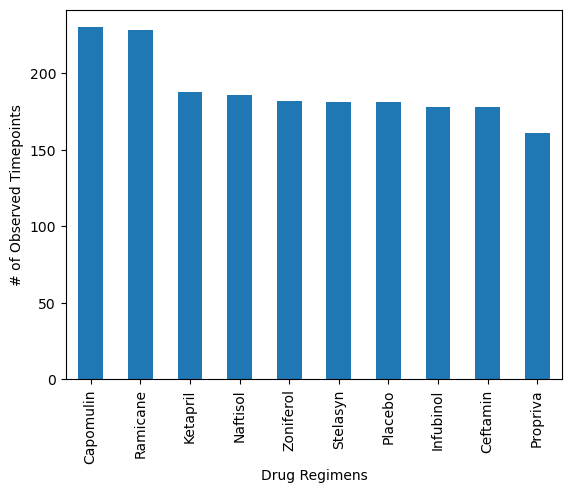

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#giving me wrong axis and too many bars
#timepoints = mouse_study_complete.groupby(["Drug Regimen"]).count().plot.bar() 
#dont need groupby?
#timepoints = mouse_study_complete["Drug Regimen"].count().plot.bar()#why does value_counts work and not count?
timepoints = mouse_study_complete["Drug Regimen"].value_counts().plot.bar()
plt.xlabel("Drug Regimens")
plt.ylabel("# of Observed Timepoints")
plt.show()

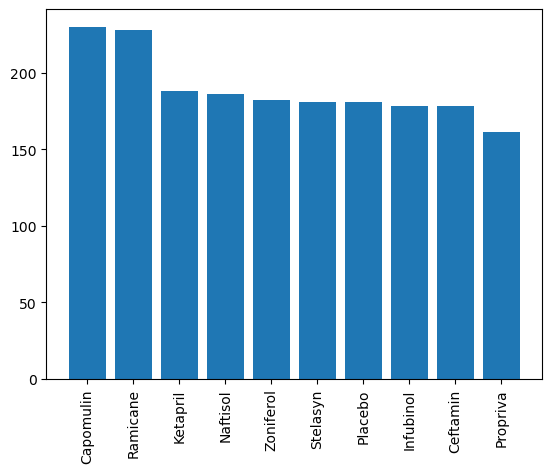

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints = mouse_study_complete["Drug Regimen"].value_counts() #set as our y-value
x_axis = np.arange(len(timepoints))
#plt.xticks(x_axis, rotation="vertical")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, timepoints.index.values)
plt.bar(x_axis, timepoints)
#fix tick marks
plt.xticks(rotation=90)
plt.show()

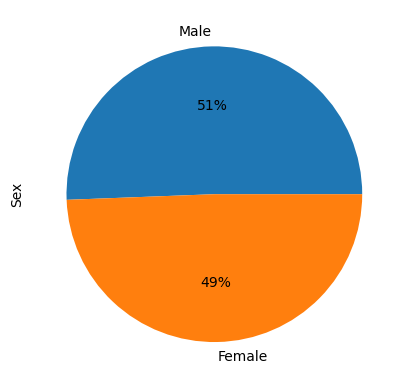

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex_count = mouse_study_complete["Sex"].value_counts()
mice_sex_count.plot.pie(autopct="%1.0f%%") #round
plt.ylabel("Sex")
plt.show()

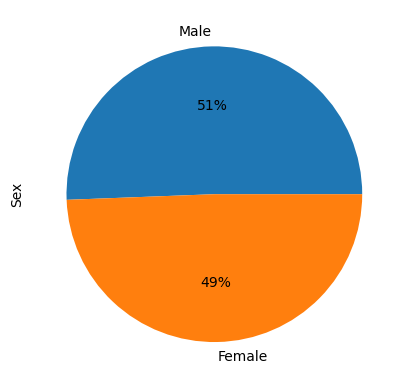

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_sex_count, labels=mice_sex_count.index, autopct="%1.0f%%") #https://pandas.pydata.org/docs/reference/api/pandas.Index.html
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#mouse_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#final_tumor_vol = mouse_study_complete.groupby('Mouse ID')['Tumor Volume (mm3)'] why does it not show?
#final_tumor_vol = mouse_study_complete.groupby('Mouse ID')['Tumor Volume (mm3)'].sort_values() #needed aggregation
#aggregation attribute error, maybe a diff agg?
#final_tumor_vol = mouse_study_complete.groupby('Mouse ID')['Tumor Volume (mm3)'].max()
#getting somwhere, but not dataframe though
#final_tumor_vol = pd.DataFrame(mouse_study_complete.groupby('Mouse ID')['Tumor Volume (mm3)'])
#dataframe columns unlabelled...
#stays unlabeled if no aggregation...
#final_tumor_vol = mouse_study_complete.groupby(['Mouse ID']) ['Tumor Volume (mm3)'].max()
#tumor_vol_df = pd.DataFrame(final_tumor_vol)
#tumor_vol_df

# Start by getting the last (greatest) timepoint for each mouse 
#why though were looking for the total volume...
#okay i see now
greatest_timepoint = mouse_study_complete.groupby(['Mouse ID']) ['Timepoint'].max()
greatest_timepoint = greatest_timepoint.reset_index() #BCS suggested to reset
#great_timepoint_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#so were almost forcing the data to sort the way want it to, specificlly these four mice drugs...i think.
#challenge instructions say to use cleaned data, so will use rmv_mouse_g989
time_tumor_df = greatest_timepoint.merge(rmv_mouse_g989, on=('Mouse ID','Timepoint'), how='left')
time_tumor_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20.0,23.0,67.973419,2.0
1,a251,45,Infubinol,Female,21.0,25.0,65.525743,1.0
2,a262,45,Placebo,Female,17.0,29.0,70.717621,4.0
3,a275,45,Ceftamin,Female,20.0,28.0,62.999356,3.0
4,a366,30,Stelasyn,Female,16.0,29.0,63.440686,1.0
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12.0,26.0,48.710661,0.0
245,z578,45,Ramicane,Male,11.0,16.0,30.638696,0.0
246,z581,45,Infubinol,Female,24.0,25.0,62.754451,3.0
247,z795,45,Naftisol,Female,13.0,29.0,65.741070,3.0


In [15]:
greatest_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
#now i see where we need the list of drugs
mouse_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
#unsure what kind of empty list, like all or for each drug?
#lets start with just tumor vol values
tumor_vol_list =[]

#capomulin_tumor_vol = []
#ramicane_tumor_vol = []
#infubinol_tumor_vol = []
#ceftamin_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#do we really need to do this first? we dont have df to reference yet
#quartiles = values.quantile([.25,.5,.75])
#lower_quartile = quartiles[.25]
#upper_quartile = quartiles[.75]
#inter_quart_range = upper_quartile - lower_quartile
#inter_quart_range
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for mouse_drug in mouse_drugs:
    find_drugs_df = time_tumor_df.loc[time_tumor_df['Drug Regimen'] == mouse_drug]
    #'False: boolean label can not be used without a boolean index' time_tumor_df needs to be in brackets also.
    #find_drugs_df looks good!
    
    # add subset 
    #so we need "final tumor volumes for each drug to the empty list"
    #in order to find last tumor volume...we need the greatest timepoint
    #final_tumor_vol = find_drugs_df.loc[find_drugs_df["Timepoint"]].max() key error
    #max_tumor_vol = find_drugs_df.loc[find_drugs_df["Timepoint"] == greatest_timepoint]
    #ValueError: Can only compare identically-labeled Series objects
    #call bcs for help!
    #bcs helped with finding it, i already had it greatest_time
    #need append
    tumors = find_drugs_df["Tumor Volume (mm3)"]
    tumor_vol_list.append(tumors)
    #now we can do this: quartiles = tumor_vol_list.quantile([.25,.5,.75])
    quartiles = tumors.quantile([.25,.5,.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[.75]
    inter_quart_range = upper_quartile - lower_quartile
    print(f"{mouse_drug} IQR : {inter_quart_range}")
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5*inter_quart_range)
    upper_bound = upper_quartile + (1.5*inter_quart_range)
    outliers = (tumors.loc[(find_drugs_df["Tumor Volume (mm3)"] >= upper_bound)|
                                 (find_drugs_df["Tumor Volume (mm3)"] <= lower_bound)])
    #for outlier in outliers:
        #if outlier is None:
            #print('None')
        #else:
            #print(outlier)
    print(f"Potential {mouse_drug} Outlier: {outliers}") #" with tumor volume of {tumors}")

Capomulin IQR : 7.781863460000004
Potential Capomulin Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane IQR : 9.098536719999998
Potential Ramicane Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol IQR : 11.477135160000003
Potential Infubinol Outlier: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin IQR : 15.577752179999997
Potential Ceftamin Outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


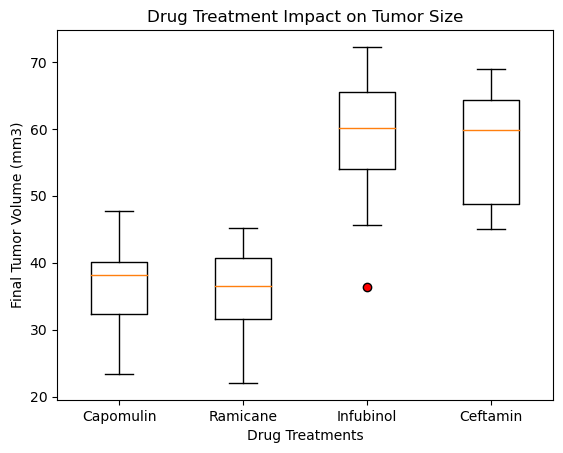

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#Using Matplotlib, generate a box plot that shows the distribution of the final tumor volume for all the mice in each treatment group. Highlight any potential
#outliers in the plot by changing their color and style.
#this is where we use tumor_vol_list!
flierprops = dict(marker='o', markerfacecolor='red',
                  markeredgecolor='black')
plt.boxplot(tumor_vol_list, flierprops=flierprops) #looks like no way around using dict
plt.xlabel("Drug Treatments")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Drug Treatment Impact on Tumor Size")
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']) #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
#need to pass a dict first for "flierprop"
#https://stackoverflow.com/questions/43342564/flier-colors-in-boxplot-with-matplotlib
plt.show()

## Line and Scatter Plots

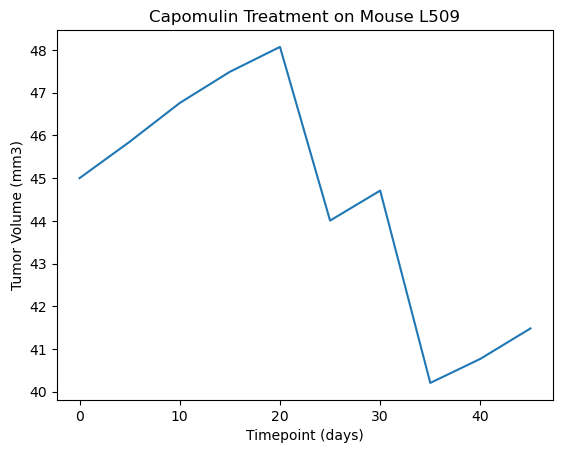

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = rmv_mouse_g989.loc[rmv_mouse_g989["Mouse ID"] == 'l509']
#mouse_l509
plt.plot(mouse_l509["Timepoint"], mouse_l509["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment on Mouse L509")
plt.show()

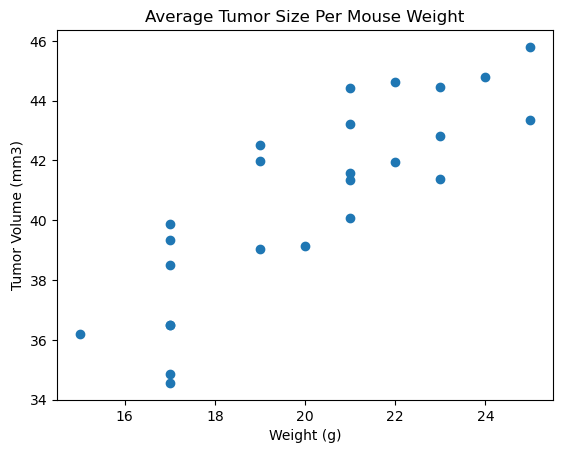

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = rmv_mouse_g989.loc[rmv_mouse_g989["Drug Regimen"] == 'Capomulin']

#find average tumor_volume of mice on drug
cap_tumor_avg = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
cap_tumor_avg = cap_tumor_avg.reset_index() #this turns index into df!!

#find weight of mice on drug
cap_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].first() #https://sparkbyexamples.com/pandas/pandas-aggregate-functions-with-examples/
cap_weight = cap_weight.reset_index()

#we should merge to simplify plot
cap_tumor_weight = cap_tumor_avg.merge(cap_weight, on=('Mouse ID'), how='left')

#call axies
x_scatter = cap_tumor_weight['Weight (g)']
y_scatter = cap_tumor_weight['Tumor Volume (mm3)']
#plot!
plt.scatter(x_scatter, y_scatter)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average Tumor Size Per Mouse Weight")
plt.show()

In [20]:
#cap_tumor_avg
#cap_weight_avg
cap_tumor_weight

,Mouse ID,Tumor Volume (mm3),Weight (g)
0,b128,41.963636,22
1,b742,40.083699,21
2,f966,36.505973,17
3,g288,41.990097,19
4,g316,44.613344,22
5,i557,44.805810,24
6,i738,39.141053,20
7,j119,44.465236,23
8,j246,43.216925,21
9,l509,44.434474,21


In [21]:
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
226,j246,Capomulin,Female,21,21,0,45.000000,0
227,r554,Capomulin,Female,8,17,0,45.000000,0
228,s185,Capomulin,Female,3,17,0,45.000000,0
229,b742,Capomulin,Male,7,21,0,45.000000,0
...,...,...,...,...,...,...,...,...
1854,s710,Capomulin,Female,1,23,45,40.728578,1
1859,j119,Capomulin,Female,7,23,45,38.125164,1
1878,i557,Capomulin,Female,1,24,45,47.685963,1
1888,r944,Capomulin,Male,12,25,45,41.581521,2


## Correlation and Regression

TypeError: Could not convert CapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulinCapomulin to numeric

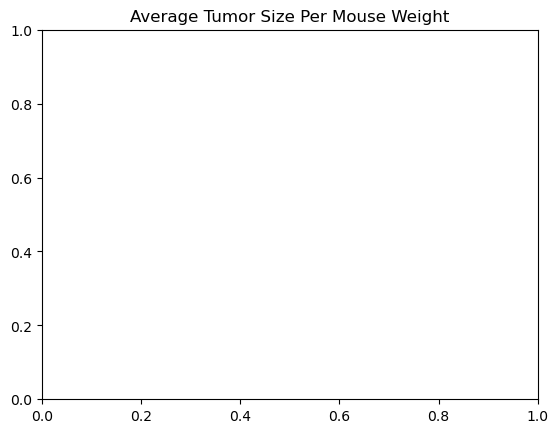

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#so just copy and paste?

#plot!
plt.title("Average Tumor Size Per Mouse Weight")
#find regression first! per BCS suggestion
capomulin_average = capomulin_df.groupby(['Mouse ID']).mean()
corr_coef =(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0]).round(2)
#find regression
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
#NameError: name 'linregress' is not defined
y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
#need scipy! can i import it twice?
##regress_values = x_scatter * slope + intercept
##line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
##plt.plot(x_scatter, regress_values,"r-")
##plt.annotate(line_eq,color=red)
plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {corr_coef}.")